# Data Exploration and Analysis

In [21]:
import numpy as np
import pandas as pd
import time
import pickle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### Create dataframe and modify

In [3]:

with open('cleaneddata.pkl', 'r') as picklefile:
    data = pickle.load(picklefile)
datay = data['Engagement'].copy()
data3=data.drop(['Recipe_URL', 'Ingredients','Recipe_Name','Engagement'], axis =1).copy()
nc = ['Comments']
data3.ix[:, nc] = (data3.ix[:, nc] - data3.ix[:, nc].min())\
                   / (data3.ix[:, nc].max() - data3.ix[:, nc].min())
datay2 = data['Engagement'].copy()
data32 =data.drop(['Recipe_URL', 'Ingredients','Recipe_Name','Comments', 'Engagement'], axis =1).copy()

In [104]:
data.describe()

,Shrimp,Squid Ink Pasta,Garlic,Scallions,Green Cabbage,Rice Vinegar,Sesame Oil,Sambal Oelek,Furikake,Soy Glaze,...,"Skin-On, Boneless Chicken Breasts",Peeled Cipollini Onions,Verjus,Epazote,"Chile Cod Spice Blend (Ancho Chile Powder, Chipotle Chile Powder, Ground Cumin & Cocoa Powder)",Japanese Sweet Potatoes,"Spiced Potatoes Spice Blend (Black Sesame Seeds, White Sesame Seeds, Kibbled Nori & Aleppo Pepper)","Mushroom Pot Pie Spice Blend ( Thyme, Rosemary, Ground Sage, Ground Bay Leaf, Smoked Paprika & Ground Nutmeg)",Comments,Engagement
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,...,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,0.042578,0.001151,0.592635,0.177215,0.032221,0.069045,0.087457,0.033372,0.008055,0.047181,...,0.001151,0.001151,0.001151,0.001151,0.001151,0.001151,0.001151,0.001151,30.164557,66.006904
std,0.202019,0.033923,0.491627,0.382071,0.176688,0.253676,0.282666,0.179709,0.089440,0.212147,...,0.033923,0.033923,0.033923,0.033923,0.033923,0.033923,0.033923,0.033923,25.887106,88.350501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,20.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,113.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,618.000000


### Count total amount of each ingredient in all recipes

In [7]:
data2 = data3.sum(axis =0)
#pd.pivot_table(data, index=["Comments"], aggfunc ='sum')
data5 = pd.DataFrame(data2)
data5
df6 = data5.sort([0], ascending = False).head(20)
df6

/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,0
Garlic\n\n,515.000000
Comments,264.777778
Lemon\n\n,237.000000
Butter\n\n,235.000000
Parmesan Cheese\n\n,166.000000
Scallions\n\n,154.000000
Red Onion\n\n,152.000000
Shallot\n\n,152.000000
Ginger\n\n,148.000000
Yellow Onion\n\n,124.000000


In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
       data32, datay2, test_size=0.30, random_state =101)

In [8]:
y = StandardScaler()
df7= y.fit_transform(data3)

### Explore coefficients from Linear regression to see which ingredients are important

In [9]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

print(lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_.T,X_train.columns,columns=['Coefficient'])
coeff_df.sort(columns='Coefficient',ascending=False)


180.804010558


/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Coefficient
"Kimchi Spice Blend (Gochugaru, Granulated Sugar, Garlic Powder, Ground Ginger, Black Sesame Seeds & White Sesame Seeds)\n\n",348.791724
Round Pugliese Bread\n\n,265.002052
Plum Tomato\n\n,260.110236
Cornish Game Hen\n\n,217.907273
"Creamy Casserole Spice Blend (Ground Yellow Mustard, Ground Fennel Seeds & Ground Bay Leaves)\n\n",207.887499
"Mexican Spice Blend (Ancho Chile Powder, Sweet Paprika, Garlic Powder, Ground Cumin & Whole Mexican Oregano)\n\n",199.446704
"Quesadilla Spice Blend (Ground Cumin, Smoked Paprika, Garlic Powder, Onion Powder, Cayenne Pepper, Ground Coriander & Ground Cinnamon)\n\n",192.730414
Chopped Chicken Breast\n\n,190.008328
Fusilli Col Buco Pasta\n\n,189.809979
Gnocchi\n\n,179.789723


### Merge ingredient count with Coefficients

In [17]:
merged = data5.merge(coeff_df, left_index=True, right_index=True, how = 'right')
#print merged.sort(0, ascending = False)


/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,0,Coefficient
Garlic\n\n,515.0,-31.896970
Lemon\n\n,237.0,-32.620372
Butter\n\n,235.0,-17.392001
Parmesan Cheese\n\n,166.0,-16.870100
Red Onion\n\n,152.0,-12.998822
Ginger\n\n,148.0,-16.645182
Yellow Onion\n\n,124.0,-15.182860
Lime\n\n,110.0,-40.903256
All-Purpose Flour\n\n,100.0,-9.873403
Red Wine Vinegar\n\n,91.0,-9.184478


### Exploratory analysis on new dataframe

In [19]:
merged[(merged[0] > 30) & (merged['Coefficient'] > 2)].sort(0, ascending = False)

/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0,Coefficient
Scallions\n\n,154.0,16.757967
Shallot\n\n,152.0,53.071132
Mayonnaise\n\n,87.0,12.201522
"Boneless, Skinless Chicken Breasts\n\n",65.0,48.021925
Red Pepper Flakes\n\n,64.0,34.896321
Carrots\n\n,60.0,5.510665
Jasmine Rice\n\n,60.0,11.473968
Parsley\n\n,59.0,2.346548
Kale\n\n,51.0,135.154734
Cod Fillets\n\n,50.0,4.433701


In [22]:
merged.sort('Coefficient', ascending=False)

/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0,Coefficient
"Kimchi Spice Blend (Gochugaru, Granulated Sugar, Garlic Powder, Ground Ginger, Black Sesame Seeds & White Sesame Seeds)\n\n",1.0,348.791724
Round Pugliese Bread\n\n,1.0,265.002052
Plum Tomato\n\n,6.0,260.110236
Cornish Game Hen\n\n,1.0,217.907273
"Creamy Casserole Spice Blend (Ground Yellow Mustard, Ground Fennel Seeds & Ground Bay Leaves)\n\n",1.0,207.887499
"Mexican Spice Blend (Ancho Chile Powder, Sweet Paprika, Garlic Powder, Ground Cumin & Whole Mexican Oregano)\n\n",1.0,199.446704
"Quesadilla Spice Blend (Ground Cumin, Smoked Paprika, Garlic Powder, Onion Powder, Cayenne Pepper, Ground Coriander & Ground Cinnamon)\n\n",1.0,192.730414
Chopped Chicken Breast\n\n,1.0,190.008328
Fusilli Col Buco Pasta\n\n,1.0,189.809979
Gnocchi\n\n,6.0,179.789723


## Run SVR and add coefficients from SVR model to better Feature engineer

In [166]:
coeff_df4 = pd.DataFrame(svr3.coef_.T,X_train.columns,columns=['CoefficientSVR'])
coeff_df4.sort(columns='CoefficientSVR',ascending=False)
merged2 = merged.merge(coeff_df4, left_index=True, right_index=True, how = 'right')
merged3 = merged2.rename(columns= {0:"Count"})
merged3.index.names=['Ingredient']
merged3[merged3['Count']>150].sort('Count', ascending= False)

/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Count,Coefficient,CoefficientSVR
Ingredient,,,
Garlic\n\n,515.0,-31.896970,-0.490047
Lemon\n\n,237.0,-32.620372,-1.223003
Butter\n\n,235.0,-17.392001,-3.319614
Parmesan Cheese\n\n,166.0,-16.870100,-6.379096
Scallions\n\n,154.0,16.757967,-5.230360
Shallot\n\n,152.0,53.071132,2.495939
Red Onion\n\n,152.0,-12.998822,-0.841348


In [157]:
merged3[(merged3['Count'] >45) & (merged3['Coefficient'] > 0) & (merged3['CoefficientSVR'] > 0)].sort('Count', ascending = False)

/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Count,Coefficient,CoefficientSVR
Ingredient,,,
Shallot\n\n,152.0,53.071132,2.495939
"Boneless, Skinless Chicken Breasts\n\n",65.0,48.021925,3.632543
Red Pepper Flakes\n\n,64.0,34.896321,12.471794
Kale\n\n,51.0,135.154734,8.377452
Cod Fillets\n\n,50.0,4.433701,3.103692
Ground Beef\n\n,48.0,37.507833,2.351771


In [155]:
merged3[(merged3['Count'] >90) & (merged3['Coefficient'] < 0) & (merged3['CoefficientSVR'] < 0)].sort('Count', ascending = False)

/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Count,Coefficient,CoefficientSVR
Ingredient,,,
Garlic\n\n,515.0,-31.896970,-0.490047
Lemon\n\n,237.0,-32.620372,-1.223003
Butter\n\n,235.0,-17.392001,-3.319614
Parmesan Cheese\n\n,166.0,-16.870100,-6.379096
Red Onion\n\n,152.0,-12.998822,-0.841348
Yellow Onion\n\n,124.0,-15.182860,-1.639621
Red Wine Vinegar\n\n,91.0,-9.184478,-7.823424


In [158]:
merged3[(merged3['Count'] >45) & (merged3['Coefficient'] > 0) & (merged3['CoefficientSVR'] < 0)].sort('Count', ascending = False)

/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Count,Coefficient,CoefficientSVR
Ingredient,,,
Scallions\n\n,154.0,16.757967,-5.230360
Mayonnaise\n\n,87.0,12.201522,-6.695846
Carrots\n\n,60.0,5.510665,-5.503173
Jasmine Rice\n\n,60.0,11.473968,-2.252609
Parsley\n\n,59.0,2.346548,-5.460835


In [163]:
merged2[(merged2[0] >100)]

,0,Coefficient,CoefficientSVR
Ingredient,,,
Garlic\n\n,515.0,-31.896970,-0.490047
Scallions\n\n,154.0,16.757967,-5.230360
Shallot\n\n,152.0,53.071132,2.495939
Lemon\n\n,237.0,-32.620372,-1.223003
Ginger\n\n,148.0,-16.645182,0.247219
Lime\n\n,110.0,-40.903256,0.877306
Yellow Onion\n\n,124.0,-15.182860,-1.639621
Butter\n\n,235.0,-17.392001,-3.319614
Parmesan Cheese\n\n,166.0,-16.870100,-6.379096


# Start Creating plots of the engagement data

In [96]:
datay3 = datay2.sort(0, ascending = False)
datay2.describe()

/Users/Guillermo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


count    869.000000
mean      66.006904
std       88.350501
min        0.000000
25%        6.000000
50%       20.000000
75%      113.000000
max      618.000000
Name: Engagement, dtype: float64

In [172]:
from matplotlib import pyplot as plt
% matplotlib inline

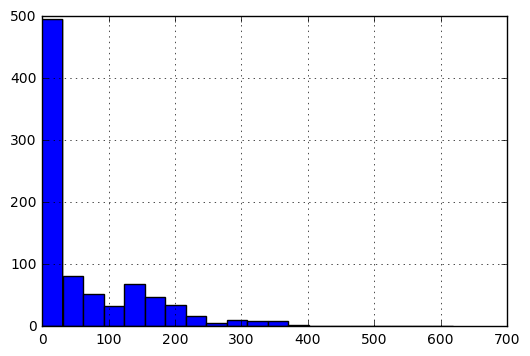

In [45]:
datay2.hist(bins = 20)i

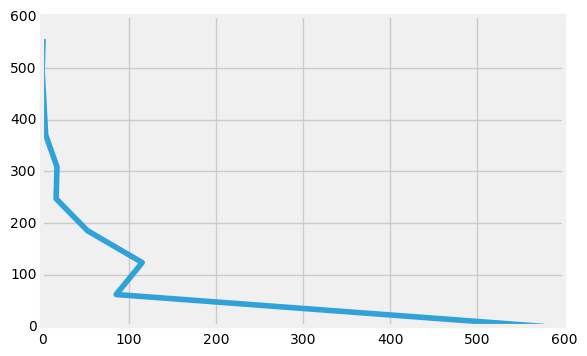

In [187]:

X = np.histogram(datay2)[0]
Y = np.histogram(datay2)[1]
plt.plot(X,Y[:-1])

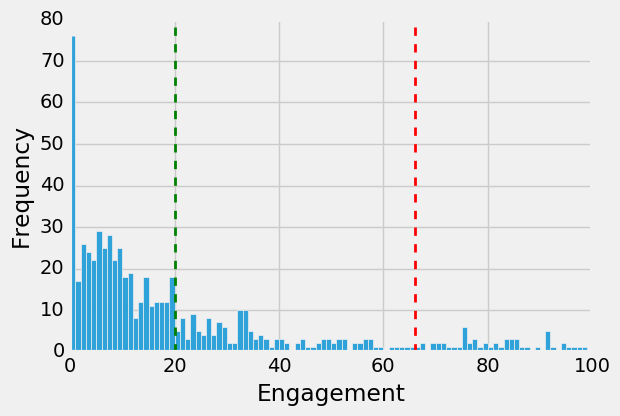

In [196]:
plt.style.use('fivethirtyeight')
datay2.hist(bins = range(0, 100))

plt.axvline(datay2.mean(), color='r', label='Mean', linestyle='dashed', linewidth=2)
plt.axvline(20, color='g', label='50%', linestyle='dashed', linewidth=2)
plt.xlabel('Engagement')
plt.ylabel('Frequency')


In [59]:
datay2.describe()

count    869.000000
mean      66.006904
std       88.350501
min        0.000000
25%        6.000000
50%       20.000000
75%      113.000000
max      618.000000
Name: Engagement, dtype: float64

# New attempt to switch ditribution of engagement data from Normal distribution to Exponential distribution

In [217]:
datay4 =datay2.apply(np.sqrt)
ar = np.array([np.random.randint(0,830) for _ in range(450)])
ar

array([407, 566, 737, 531, 559, 658, 439, 623, 139, 127, 679,  15, 742,
        12,  54, 627, 726, 207,  69, 526,  86,  59, 279, 307, 561,   7,
       824, 195, 273,  66, 635, 422, 314, 218, 528, 248, 320,  68, 277,
       139, 664, 280, 455, 697, 714,  28, 320, 813, 632, 167, 191, 245,
        63, 637, 105, 717, 730, 741,  40, 274, 270, 814, 262, 292, 437,
       402, 791, 412, 353, 407, 490, 705, 657, 663, 625, 189, 726, 233,
       149, 176, 391, 589, 730, 301, 140, 243, 579, 129, 125, 466, 805,
       808, 133, 782, 670, 164, 181, 716, 767, 278, 792, 421, 559, 270,
       651, 354, 505, 593, 410, 477,  76, 780, 130, 445, 371, 333, 135,
       118, 553, 136, 675, 310, 439, 439,  50, 436, 781,  23,  42, 737,
        31, 129,  92, 653, 359, 159, 473, 736, 294, 249, 656, 604, 700,
       432, 500, 261, 154, 401,  35, 353, 267, 357, 185, 363, 429, 308,
       481, 287, 329, 710, 316, 591, 332, 783, 374,  50, 333, 138, 734,
       793, 540,  39, 774, 348, 434, 269, 212, 384, 755, 325, 41

In [229]:
datay2 = datay2.apply(lambda x: np.sqrt(x) if np.random.ranf()<0.5 else -np.sqrt(x))

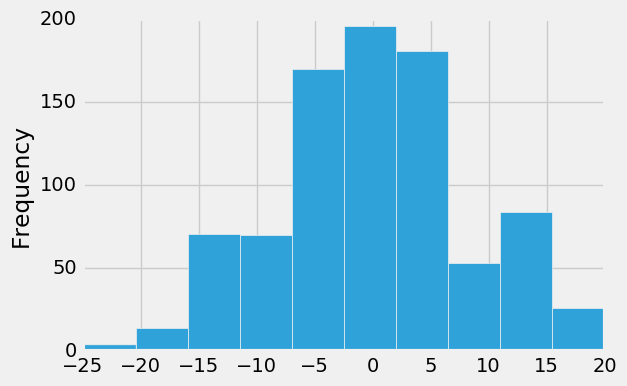

In [230]:
datay4.plot(kind='hist')
plt.style.use('fivethirtyeight')

## Rerun best model with new distribution

In [231]:
from sklearn.cross_validation import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
       data32, datay4, test_size=0.30, random_state =101)

In [233]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.cross_validation import KFold
from sklearn import cross_validation




In [236]:
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[svr_lin, lr, ridge], 
                           meta_regressor=svr_rbf)

# Training the stacking classifier

#stregr.fit(X2_train, y2_train)
#stregr.predict(X2_test)

svr_lin.fit(X2_train, y2_train)

# Evaluate and visualize the fit

#print("Mean Squared Error: %.4f"
      #% np.mean((svr_lin.predict(X2_test) - y2_train) ** 2))
#print('Variance Score: %.4f' % stregr.score(X2_train, y2_train))
'''
with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, stregr.predict(X), c='darkgreen', lw=2)

plt.show()'''
svr_lin.predict(X2_test)
predictions = svr_lin.predict(X2_test)
np.sqrt(mean_squared_error(y2_test.values,predictions))

8.6022197056553864

# Huge improvement